In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Libraries imported.")

# Load the new CSV file
data = pd.read_csv('../data/simulated_smartwatch_data.csv')

# --- Check the data ---
print(f"Successfully loaded {len(data)} samples.")
print("\n--- Data Head ---")
print(data.head())

print("\n--- Data Info ---")
data.info()

Libraries imported.
Successfully loaded 9300 samples.

--- Data Head ---
                    timestamp  heart_rate   accel_x   accel_y   accel_z  \
0  2025-10-19 01:01:14.813119   77.462173  0.074257 -0.298184  1.014568   
1  2025-10-19 01:02:39.813119   65.652073  0.064693 -0.007895  1.116850   
2  2025-10-19 00:36:58.813119   78.061260  0.099220  0.206752  0.949472   
3  2025-10-19 01:24:32.813119   91.072714 -0.067292  0.756044  0.681467   
4  2025-10-19 01:47:48.813119  109.426382 -0.581004  0.606130  0.071048   

            label  
0  Normal_Resting  
1  Normal_Resting  
2  Normal_Resting  
3  Normal_Walking  
4  Normal_Walking  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   9300 non-null   object 
 1   heart_rate  9250 non-null   float64
 2   accel_x     9250 non-null   float64
 3   accel_y     9250 non-

In [8]:
# --- 3. Pre-process Data ---

# Fill all NaN (missing) values with 0
# This makes 'Anomaly_DataLoss' a row of all zeros
data_filled = data.fillna(0)

print("Filled NaN values. Checking info again:")
data_filled.info()

# --- Separate Features (X) and Labels (y) ---

# X is our 'features' (the sensor data)
# We drop 'label' and 'timestamp' because they aren't features
X = data_filled.drop(['label', 'timestamp'], axis=1)

# y is our 'label' (the answer)
y = data_filled['label']

print("\n--- Features (X) ---")
print(X.head())

print("\n--- Labels (y) ---")
print(y.head())

Filled NaN values. Checking info again:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   9300 non-null   object 
 1   heart_rate  9300 non-null   float64
 2   accel_x     9300 non-null   float64
 3   accel_y     9300 non-null   float64
 4   accel_z     9300 non-null   float64
 5   label       9300 non-null   object 
dtypes: float64(4), object(2)
memory usage: 436.1+ KB

--- Features (X) ---
   heart_rate   accel_x   accel_y   accel_z
0   77.462173  0.074257 -0.298184  1.014568
1   65.652073  0.064693 -0.007895  1.116850
2   78.061260  0.099220  0.206752  0.949472
3   91.072714 -0.067292  0.756044  0.681467
4  109.426382 -0.581004  0.606130  0.071048

--- Labels (y) ---
0    Normal_Resting
1    Normal_Resting
2    Normal_Resting
3    Normal_Walking
4    Normal_Walking
Name: label, dtype: object


In [9]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets...")

# Split the data
# test_size=0.3 means 30% goes to testing, 70% to training
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # 'stratify' makes sure both train/test sets get a fair mix of all 7 labels
)

print("\nSplit complete.")
print(f"X_train (practice questions): {X_train.shape}")
print(f"X_test (exam questions):  {X_test.shape}")
print(f"y_train (practice answers): {y_train.shape}")
print(f"y_test (exam answers):  {y_test.shape}")

Splitting data into training and testing sets...

Split complete.
X_train (practice questions): (6510, 4)
X_test (exam questions):  (2790, 4)
y_train (practice answers): (6510,)
y_test (exam answers):  (2790,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

print("Initializing the Random Forest Classifier...")

# Create the model
final_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training the final model on 6,510 practice samples...")

# Train the model on the 'practice' data
final_model.fit(X_train, y_train)

print("\n--- Model Training Complete! ---")

Initializing the Random Forest Classifier...
Training the final model on 6,510 practice samples...

--- Model Training Complete! ---


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Evaluating the model on the 2,790 'exam' samples...")

# 1. Get the model's predictions (its "guesses")
y_pred = final_model.predict(X_test)

# 2. Calculate the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Overall Accuracy ---")
print(f"The model is {accuracy * 100:.2f}% accurate! 🎯")

# 3. Print the detailed report card
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Evaluating the model on the 2,790 'exam' samples...

--- Overall Accuracy ---
The model is 98.75% accurate! 🎯

--- Classification Report ---
                       precision    recall  f1-score   support

     Anomaly_DataLoss       1.00      1.00      1.00        15
         Anomaly_Fall       1.00      0.93      0.97        30
  Anomaly_HealthEvent       0.97      0.97      0.97        30
Anomaly_SensorFailure       1.00      1.00      1.00        15
       Normal_Resting       1.00      1.00      1.00      1080
       Normal_Running       0.97      0.97      0.97       540
       Normal_Walking       0.98      0.99      0.99      1080

             accuracy                           0.99      2790
            macro avg       0.99      0.98      0.98      2790
         weighted avg       0.99      0.99      0.99      2790



Plotting Confusion Matrix...


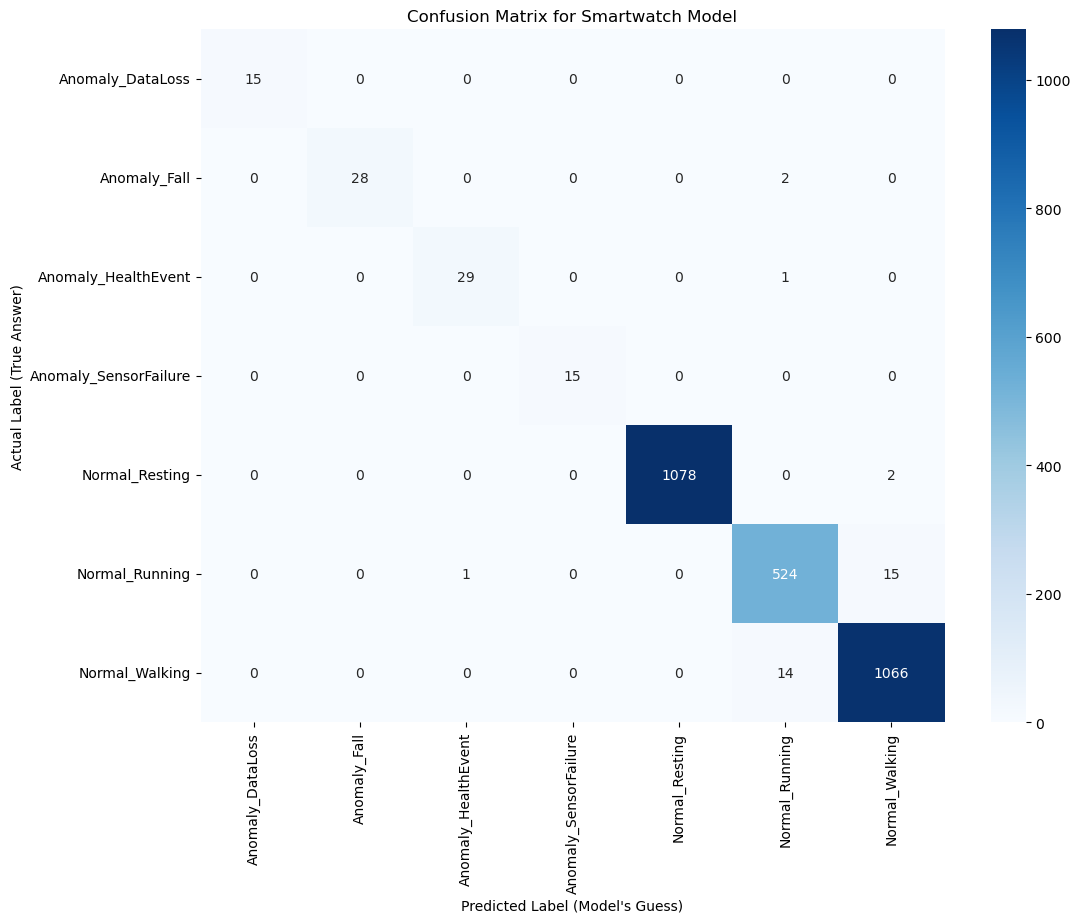

In [12]:
print("Plotting Confusion Matrix...")

# Get the list of all 7 labels
labels = sorted(y.unique())

# Calculate the matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot it as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    cm, 
    annot=True,     # Show the numbers
    fmt='d',        # Format as integers
    cmap='Blues',   # Color scheme
    xticklabels=labels, 
    yticklabels=labels
)

plt.title('Confusion Matrix for Smartwatch Model')
plt.ylabel('Actual Label (True Answer)')
plt.xlabel('Predicted Label (Model\'s Guess)')
plt.show()

In [13]:
# --- 9. Save the Final Model ---
import joblib

# Define the filename
final_model_filename = '../models/soldier_smartwatch_model.joblib'

print(f"Saving final model to {final_model_filename} ...")

# Use joblib.dump to save the 'final_model' variable
joblib.dump(final_model, final_model_filename)

print("--- Model Saved Successfully! ---")

Saving final model to ../models/soldier_smartwatch_model.joblib ...
--- Model Saved Successfully! ---


Running t-SNE to squish 4 features into 2...
t-SNE complete. Plotting...


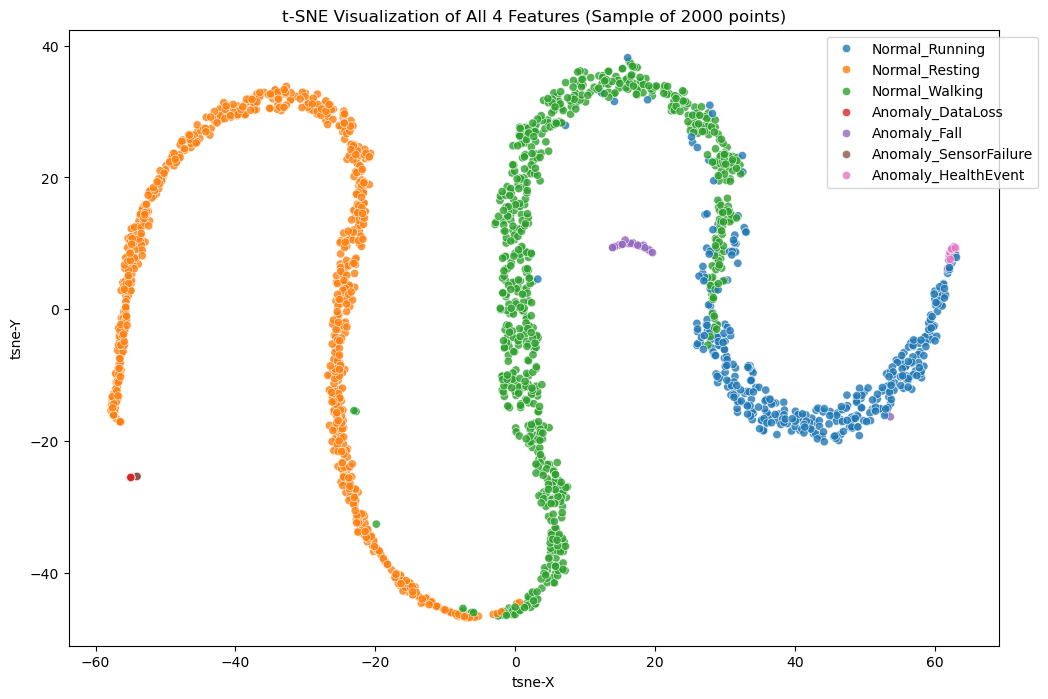

In [15]:
from sklearn.manifold import TSNE

print("Running t-SNE to squish 4 features into 2...")

# We'll use our existing X_train and y_train
# Let's take a sample of 2000 points to speed it up
tsne_sample_X = X_train.sample(n=2000, random_state=42)
tsne_sample_y = y_train.loc[tsne_sample_X.index] # Get the matching labels

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# 'fit_transform' runs the algorithm and gives us the 2D results
tsne_results = tsne.fit_transform(tsne_sample_X)

print("t-SNE complete. Plotting...")

# Create a new DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne-X', 'tsne-Y'])
tsne_df['label'] = tsne_sample_y.values # Add the labels

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df,
    x='tsne-X',
    y='tsne-Y',
    hue='label', # Color by the label
    alpha=0.8
)
plt.title('t-SNE Visualization of All 4 Features (Sample of 2000 points)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1)) # Move legend outside
plt.show()

Plotting two features: 'heart_rate' vs. 'accel_y'


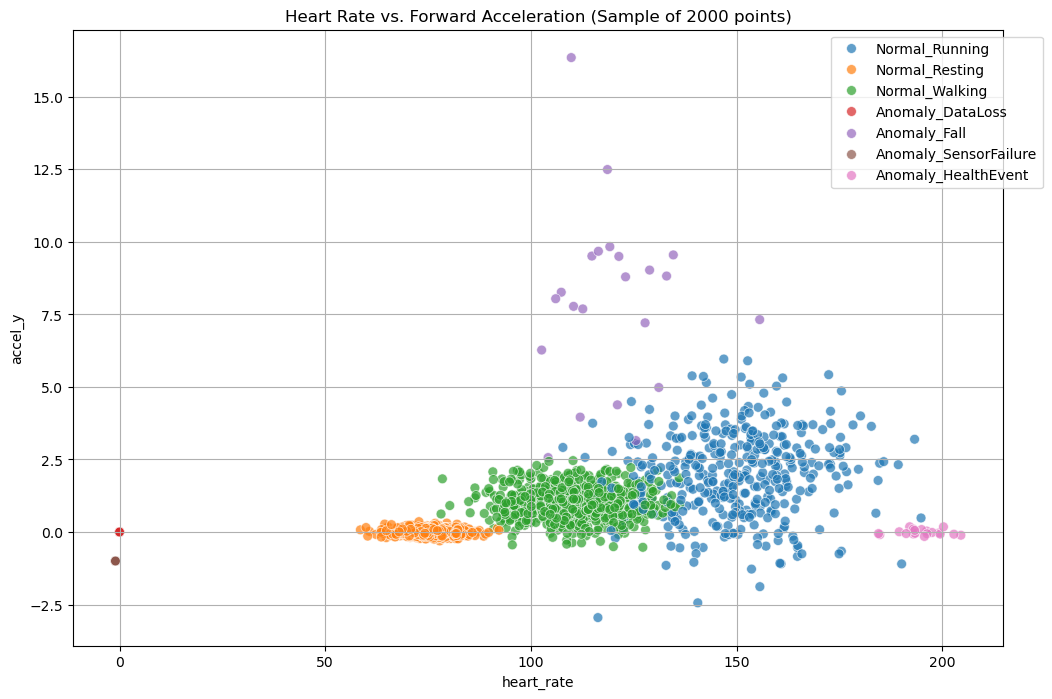

In [16]:
print("Plotting two features: 'heart_rate' vs. 'accel_y'")

# We need to add the 'label' column back to our X_train data for plotting
plot_df = X_train.copy()
plot_df['label'] = y_train

# Take a random sample of 2000 points so the plot is readable
sample_df = plot_df.sample(n=2000, random_state=42)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sample_df,
    x='heart_rate',
    y='accel_y',
    hue='label',  # Color each dot by its label
    alpha=0.7,    # Make the dots slightly transparent
    s=50          # Make the dots a bit bigger
)

plt.title('Heart Rate vs. Forward Acceleration (Sample of 2000 points)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1)) # Move legend outside the plot
plt.grid(True)
plt.show()

In [17]:
import joblib

print("Saving the final, corrected model...")

# Define the filename
final_model_filename = '../models/soldier_smartwatch_model.joblib'

# Use joblib.dump to save the 'final_model' variable
joblib.dump(final_model, final_model_filename)

print("--- Model Saved Successfully! ---")
print(f"Your model is now saved at: {final_model_filename}")

Saving the final, corrected model...
--- Model Saved Successfully! ---
Your model is now saved at: ../models/soldier_smartwatch_model.joblib
